In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CSV_data/HousePrice/train.csv')

In [3]:
test = pd.read_csv('CSV_data/HousePrice/test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
cat_type = {
    'MSZoning' : df['MSZoning'].unique(),
    'Street' : df['Street'].unique(),
    'Alley' : df['Alley'].unique(),
    'LotShape' : df['LotShape'].unique(),
    'LandContour' : df['LandContour'].unique(),
    'Utilities' : df['Utilities'].unique(),
    'Neighborhood' : df['Neighborhood'].unique(),
    'LotConfig' : df['LotConfig'].unique(),
    'BldgType' : df['BldgType'].unique(),
    'HouseStyle' : df['HouseStyle'].unique()
}

In [7]:
for i in cat_type:
    print(cat_type[i])

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtFinSF1',  'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
test.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtFinSF1',  'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

In [11]:
df.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [12]:
#First models

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from scipy.stats import pearsonr

In [14]:
X = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=21)

In [16]:
num_columns = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',\
'YearBuilt', 'YearRemodAdd', 'MasVnrArea','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',\
'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',\
'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', \
'MiscVal', 'MoSold', 'YrSold']

In [17]:
cat_columns = ['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 
'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',  
'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [103]:
X_train_num = X_train[num_columns]
X_valid_num = X_valid[num_columns]
X_test_num = test[num_columns]

In [59]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 710 to 969
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   LotShape       1168 non-null   object
 2   LandContour    1168 non-null   object
 3   Utilities      1168 non-null   object
 4   LotConfig      1168 non-null   object
 5   LandSlope      1168 non-null   object
 6   Neighborhood   1168 non-null   object
 7   Condition1     1168 non-null   object
 8   Condition2     1168 non-null   object
 9   BldgType       1168 non-null   object
 10  HouseStyle     1168 non-null   object
 11  RoofStyle      1168 non-null   object
 12  RoofMatl       1168 non-null   object
 13  Exterior1st    1168 non-null   object
 14  Exterior2nd    1168 non-null   object
 15  ExterQual      1168 non-null   object
 16  ExterCond      1168 non-null   object
 17  Foundation     1168 non-null   object
 18  BsmtQual       1168 non-null   o

In [60]:
X_valid_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
880,881,20,60.0,7024,5,5,2005,2006,0.0,1090,...,450,0,49,0,0,0,0,0,6,2007
605,606,60,85.0,13600,7,6,1965,1990,176.0,768,...,486,0,42,0,0,189,0,0,10,2009
1166,1167,20,64.0,10475,8,5,2008,2008,72.0,1694,...,776,160,33,0,0,0,0,0,2,2010
216,217,20,65.0,8450,7,5,2004,2004,266.0,1436,...,484,139,98,0,0,0,0,0,4,2008
970,971,50,60.0,10800,4,4,1949,1950,0.0,720,...,0,0,0,0,0,0,0,0,12,2006


In [104]:
lr = LinearRegression()

In [105]:
lr.fit(X_train_num, y_train)

LinearRegression()

In [106]:
print(lr.score(X_valid_num, y_valid))

0.7726237053954006


In [107]:
print(root_mean_squared_error(y_valid, lr.predict(X_valid_num)))

39255.57394936035


In [108]:
svr = SVR(kernel='poly')

In [109]:
svr.fit(X_train_num, y_train)

SVR(kernel='poly')

In [110]:
print(svr.score(X_valid_num, y_valid))

-0.03887990894348814


In [59]:
print(root_mean_squared_error(y_valid, svr.predict(X_valid_num)))

83909.55402021366


In [86]:
svr2 = SVR(kernel = 'linear')

In [31]:
svr2.fit(X_train_num, y_train)

SVR(kernel='linear')

In [32]:
print(svr2.score(X_valid_num, y_valid))

0.703688357381555


In [60]:
print(root_mean_squared_error(y_valid, svr2.predict(X_valid_num)))

44812.90490747297


In [34]:
gbr = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.1, random_state=42)

In [35]:
gbr.fit(X_train_num, y_train)

GradientBoostingRegressor(criterion='squared_error', random_state=42)

In [36]:
print(gbr.score(X_valid_num, y_valid))

0.8219363349313353


In [61]:
print(root_mean_squared_error(y_valid, gbr.predict(X_valid_num)))

34738.92645178132


In [63]:
rf = RandomForestRegressor(n_estimators=10, random_state=0)

In [64]:
rf.fit(X_train_num, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [67]:
print(rf.score(X_valid_num, y_valid))

0.8360668767123339


In [66]:
print(root_mean_squared_error(y_valid, rf.predict(X_valid_num)))

33332.055455408045


In [68]:
#Correlation and limitation of numerical columns

In [111]:
corr_df = df[num_columns]

In [113]:
corr_df.loc[:,'SalePrice'] = df['SalePrice']

In [114]:
corr_values = corr_df.corr()

<Axes: >

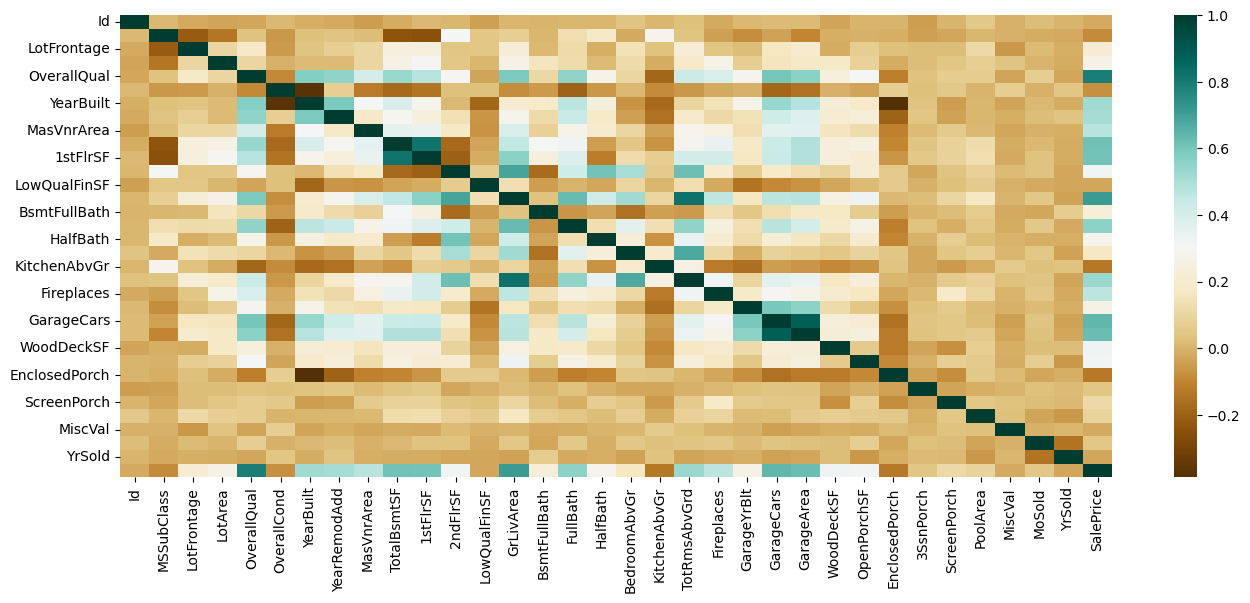

In [115]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr_values, cmap='BrBG')

In [116]:
best_num_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

In [117]:
X_train_best_num = X_train_num[best_num_cols]
X_valid_best_num = X_valid_num[best_num_cols]

In [81]:
lr.fit(X_train_best_num, y_train)

LinearRegression()

In [82]:
print(lr.score(X_valid_best_num, y_valid))

0.74514821684323


In [84]:
print(root_mean_squared_error(y_valid, lr.predict(X_valid_best_num)))

41559.716600327025


In [87]:
svr2.fit(X_train_best_num, y_train)

SVR(kernel='linear')

In [88]:
print(svr2.score(X_valid_best_num, y_valid))

0.6427255309041142


In [89]:
print(root_mean_squared_error(y_valid, svr2.predict(X_valid_best_num)))

49207.32202279083


In [90]:
param_grid_gbr={
    "learning_rate":[0.05, 0.1, 0.2],
    "n_estimators" : [40, 100, 250],
    "max_depth" : [3, 5, 8]
}

In [91]:
gbr2 = GradientBoostingRegressor(criterion='squared_error', random_state=42)

In [92]:
CV_gbr = GridSearchCV(estimator=gbr2, param_grid=param_grid_gbr, cv=5)

In [93]:
CV_gbr.fit(X_train_best_num, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [40, 100, 250]})

In [97]:
CV_gbr.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 40}

In [98]:
CV_gbr.best_score_

0.8250241125102503

In [106]:
param_grid_rf={
    "n_estimators" : [100, 150, 200, 300],
    "max_depth" : [5, 8, 12, 15],
    "min_samples_split" : [3, 4, 6, 9]
}

In [107]:
rf2 = RandomForestRegressor(n_estimators=10, random_state=0)

In [108]:
CV_rf = GridSearchCV(estimator=rf2, param_grid=param_grid_rf, cv=5)

In [109]:
CV_rf.fit(X_train_best_num, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             param_grid={'max_depth': [5, 8, 12, 15],
                         'min_samples_split': [3, 4, 6, 9],
                         'n_estimators': [100, 150, 200, 300]})

In [110]:
CV_rf.best_params_

{'max_depth': 8, 'min_samples_split': 9, 'n_estimators': 200}

In [111]:
CV_rf.best_score_

0.8240594809865996

In [19]:
# Categorical columns with Random Forest Regression

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [24]:
ohe = OneHotEncoder(drop='first')

In [79]:
for i in X[cat_columns].columns:    
    print(X[cat_columns][i].name)
    print(X[cat_columns][i].apply(type).unique())

MSZoning
[<class 'str'>]
LotShape
[<class 'str'>]
LandContour
[<class 'str'>]
Utilities
[<class 'str'>]
LotConfig
[<class 'str'>]
LandSlope
[<class 'str'>]
Neighborhood
[<class 'str'>]
Condition1
[<class 'str'>]
Condition2
[<class 'str'>]
BldgType
[<class 'str'>]
HouseStyle
[<class 'str'>]
RoofStyle
[<class 'str'>]
RoofMatl
[<class 'str'>]
Exterior1st
[<class 'str'>]
Exterior2nd
[<class 'str'>]
ExterQual
[<class 'str'>]
ExterCond
[<class 'str'>]
Foundation
[<class 'str'>]
BsmtQual
[<class 'str'> <class 'int'>]
BsmtCond
[<class 'str'> <class 'int'>]
BsmtExposure
[<class 'str'> <class 'int'>]
Heating
[<class 'str'>]
HeatingQC
[<class 'str'>]
CentralAir
[<class 'str'>]
Electrical
[<class 'str'> <class 'int'>]
KitchenQual
[<class 'str'>]
Functional
[<class 'str'>]
GarageType
[<class 'str'> <class 'int'>]
GarageFinish
[<class 'str'> <class 'int'>]
GarageQual
[<class 'str'> <class 'int'>]
GarageCond
[<class 'str'> <class 'int'>]
PavedDrive
[<class 'str'>]
SaleType
[<class 'str'>]
SaleConditi

In [36]:
incorrect_types = ['BsmtQual', 'BsmtCond','BsmtExposure', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [80]:
for i in incorrect_types:
    X[i] = str(X[i])

In [81]:
X_ohe_cat = ohe.fit_transform(X[cat_columns])

In [82]:
feature_names = ohe.get_feature_names_out()

In [83]:
print(len(feature_names))

154


In [84]:
print(X_ohe_cat.shape)

(1460, 154)


In [87]:
X_train_cat, X_valid_cat, y_train, y_valid = train_test_split(X_ohe_cat, y, test_size=0.2, random_state=21)

In [86]:
rf3 = RandomForestRegressor()

In [88]:
rf3.fit(X_train_cat, y_train)

RandomForestRegressor()

In [92]:
importances = pd.DataFrame(data={'feature': feature_names, 'importance': rf3.feature_importances_})

In [96]:
importances.sort_values(by='importance', ascending=False, inplace=True)

In [97]:
importances.head()

,feature,importance
110,ExterQual_TA,0.336326
69,RoofStyle_Hip,0.075013
131,KitchenQual_Gd,0.041874
31,Neighborhood_NoRidge,0.036781
32,Neighborhood_NridgHt,0.030943


In [99]:
print(rf3.score(X_valid_cat, y_valid))

0.6692098932777282


In [100]:
print(root_mean_squared_error(y_valid, rf3.predict(X_valid_cat)))

47348.36590818652


In [101]:
# Models with the best numerical and the best categorical column (ExterQual_TA)

In [186]:
X_best = X[best_num_cols]

In [187]:
X_dense= X_ohe_cat[110].todense()

In [192]:
X_best.loc[:,'ExterQual_TA'] = pd.DataFrame(X_dense).melt()['value']

In [207]:
X_best = X_best.fillna(0)

In [210]:
X_best['ExterQual_TA'] = X_best['ExterQual_TA'].astype(int)

In [213]:
X_train_all, X_valid_all, y_train, y_valid = train_test_split(X_best, y, test_size=0.2, random_state=21)

In [214]:
rf4 = RandomForestRegressor(max_depth=8, min_samples_split=9, n_estimators=200)

In [215]:
rf4.fit(X_train_all, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=9, n_estimators=200)

In [216]:
print(rf4.score(X_valid_all, y_valid))

0.784860740733287


In [217]:
X_train_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 710 to 969
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1168 non-null   int64
 1   GrLivArea     1168 non-null   int64
 2   GarageCars    1168 non-null   int64
 3   GarageArea    1168 non-null   int64
 4   TotalBsmtSF   1168 non-null   int64
 5   1stFlrSF      1168 non-null   int64
 6   ExterQual_TA  1168 non-null   int32
dtypes: int32(1), int64(6)
memory usage: 68.4 KB


In [218]:
gbr3 = GradientBoostingRegressor(criterion='squared_error', random_state=42, learning_rate=0.1, max_depth=5, n_estimators=40)

In [219]:
gbr3.fit(X_train_all, y_train)

GradientBoostingRegressor(criterion='squared_error', max_depth=5,
                          n_estimators=40, random_state=42)

In [220]:
print(gbr3.score(X_valid_all, y_valid))

0.7389851792994804


In [ ]:
# Regularization model Lasso

In [221]:
from sklearn.linear_model import Lasso
import numpy as np

In [222]:
lasso = Lasso(alpha=1.0)

In [223]:
lasso.fit(X_train_all, y_train)

Lasso()

In [228]:
print(lasso.score(X_valid_all, y_valid))

0.7451524108120917


In [224]:
lasso_pred = lasso.predict(X_valid_all)

In [225]:
print(root_mean_squared_error(lasso_pred, y_valid))

41559.374635141874


In [226]:
importance_df = pd.DataFrame({
    'Feature': X_train_all.columns,
    'Importance': np.abs(lasso.coef_)
}).sort_values(by='Importance', ascending=False)

In [227]:
importance_df.head()

,Feature,Importance
0,OverallQual,23270.502084
2,GarageCars,16250.658495
6,ExterQual_TA,3278.067945
1,GrLivArea,46.284464
4,TotalBsmtSF,24.300123
